In [1]:
import pandas as pd
A=pd.read_csv("C://Users//Pranita//DL_P//Notebooks//DATA/Mall_Customers.csv")

In [2]:
A.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
A.columns,A.shape

(Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
        'Spending Score (1-100)'],
       dtype='object'),
 (200, 5))

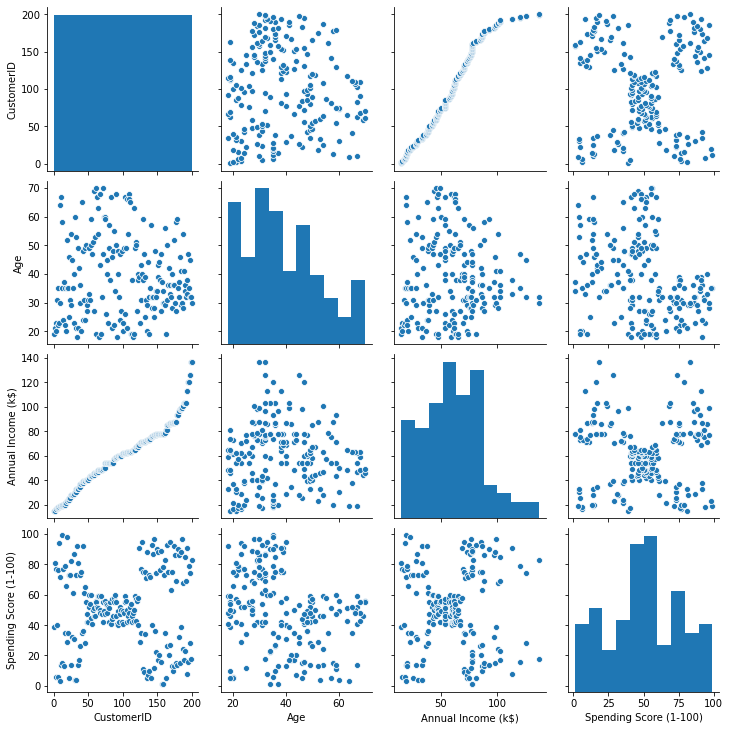

In [4]:
import seaborn as sb
import matplotlib.pyplot as plt

sb.pairplot(A)

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
B=A[["Annual Income (k$)","Spending Score (1-100)"]]
#B=pd.DataFrame(A.apply(le.fit_transform),columns=A.columns)

In [6]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=4)

model=km.fit(B)

In [7]:
model.inertia_

73679.78903948837

In [8]:
#Elbow Curve

WCSS=[]
k=range(1,40)
for i in k:
    from sklearn.cluster import KMeans
    km=KMeans(n_clusters=i)
    model=km.fit(B)
    WCSS.append(model.inertia_)

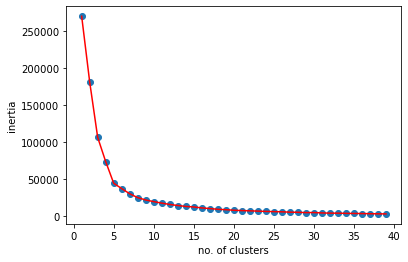

In [9]:
plt.scatter(k,WCSS)
plt.plot(k,WCSS,c="red")
plt.xlabel("no. of clusters")
plt.ylabel("inertia")
plt.show()
#k=5

In [13]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5)
model=km.fit(B)
   

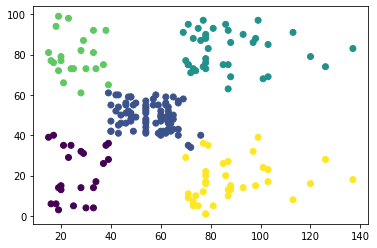

In [14]:
plt.scatter(B["Annual Income (k$)"],B["Spending Score (1-100)"],c=model.labels_)
plt.show()

<ipython-input-15-f4ab66736f5e>:8: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix=linkage(C)


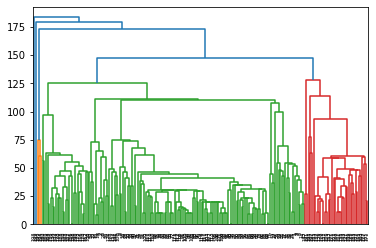

In [15]:
#for Agglomerative Clustering

from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.spatial import distance_matrix

# Create distance matrix for point to point distance
C=pd.DataFrame(distance_matrix(B.values,B.values))

# Pass linkage matrix to dendogram function and plot it
linkage_matrix=linkage(C)

# Pass linkage matrix to dendogram function and plot it
dendrogram(linkage_matrix)

plt.show()